In [ ]:
import numpy as np    # import numpy library 
import pandas as pd   # import pandas library for accessing and analyzing the data
from sklearn.impute import KNNImputer  
#KNN Iputation library for handaling missing data commented out after processing once and stored the imputed data in new file as it takes 1 hour to process,
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
import matplotlib.pyplot as plt # import matplotlib library for plots and visualization
import seaborn as sns  
from sklearn.model_selection import train_test_split   # import train-test split for splitting the data into train and test
from sklearn.preprocessing import MinMaxScaler   #library used for scaling and standardizing the data
%matplotlib inline  
#It is used to plot the matplotlib charts just below the code cells


In [23]:
df=pd.read_csv('Loan_Cleaned_10.csv')

In [24]:
df

,Unnamed: 0,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,...,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Home Mortgage,Own Home,Purpose,Unnamed: 19,Unnamed: 20
0,0,1,11520,1,741.0,10.0,33694.0,584.03,12.3,41.0,...,0,6760.0,16056,0,0,1,0,203605,NaN,NaN
1,1,1,3441,1,734.0,4.0,42269.0,1106.04,26.3,24.0,...,0,6262.0,19149,0,0,1,0,14196,NaN,NaN
2,2,1,21029,1,747.0,10.0,90126.0,1321.85,28.8,35.6,...,0,20967.0,28335,0,0,1,0,203605,NaN,NaN
3,3,1,18743,1,747.0,10.0,38072.0,751.92,26.2,40.0,...,0,22529.0,43915,0,0,0,1,203605,NaN,NaN
4,4,1,11731,1,746.0,4.0,50025.0,355.18,11.5,42.4,...,0,17391.0,37081,0,0,0,0,203605,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230998,256444,0,11953,1,717.0,10.0,39844.0,982.82,11.7,52.2,...,1,4176.0,4783,1,0,1,0,203605,NaN,NaN
230999,256446,1,3911,1,718.0,2.0,90041.0,1706.58,19.9,47.8,...,0,39804.7,44080,0,0,0,0,203605,NaN,NaN
231000,256447,1,5078,1,737.0,10.0,77186.0,1376.47,19.1,47.0,...,0,1717.0,9758,0,0,0,1,203605,NaN,NaN
231001,256448,0,12116,1,746.0,9.0,52504.0,297.96,15.1,82.0,...,0,3315.0,20090,0,0,1,0,203605,NaN,NaN


In [25]:
X=df.drop(columns=['Loan Status','Unnamed: 0','Unnamed: 19','Unnamed: 20'])

In [26]:
type(X)

pandas.core.frame.DataFrame

In [27]:
y = df['Loan Status']

In [28]:
y.value_counts()

Loan Status
1    138315
0     92688
Name: count, dtype: int64

In [29]:
# Scaling
scaler = MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X = pd.DataFrame(X_scaled,columns=X.columns)



In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state=100)

In [31]:
X_train.head(2)

,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Home Mortgage,Own Home,Purpose
199453,0.000239,0.0,0.653333,0.3,1.000000,0.692041,0.266766,0.172727,0.236842,0.0,0.234762,0.000184,0.0,0.0,1.0,0.0,1.000000
97271,0.000042,1.0,0.346667,0.8,0.260097,0.162323,0.143070,0.125000,0.197368,0.0,0.212523,0.000076,0.0,0.0,0.0,1.0,0.068548


In [32]:
X_train.shape

(173252, 17)

In [33]:
X_test.head(2)

,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Home Mortgage,Own Home,Purpose
196836,0.000054,1.0,0.848000,1.0,0.376166,0.119752,0.339791,0.264773,0.105263,0.0,0.317542,0.000131,0.0,0.0,0.0,0.0,1.000000
61487,0.000046,1.0,0.405333,1.0,0.419985,0.096373,0.189270,0.213636,0.078947,0.0,0.238346,0.000138,0.0,0.0,1.0,0.0,0.014778


In [34]:
X_train.shape

(173252, 17)

In [35]:
X_train.isna().sum()

Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Annual Income                   0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
Home Mortgage                   0
Own Home                        0
Purpose                         0
dtype: int64

In [36]:
X_test.shape

(57751, 17)

In [37]:
Y_train.head(2)

199453    1
97271     1
Name: Loan Status, dtype: int64

In [38]:
Y_train.value_counts()

Loan Status
1    103748
0     69504
Name: count, dtype: int64

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [40]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(Y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(Y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(Y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(Y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(Y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(Y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(Y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(Y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(Y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(Y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n') 

Logisitic Regression
Model performance for Training set
- Accuracy: 0.6285
- F1 score: 0.5857
- Precision: 0.6381
- Recall: 0.8771
- Roc Auc Score: 0.5672
----------------------------------
Model performance for Test set
- Accuracy: 0.6290
- F1 score: 0.5866
- Precision: 0.6384
- Recall: 0.8768
- Roc Auc Score: 0.5682


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.5552
- F1 score: 0.5561
- Precision: 0.6307
- Recall: 0.6196
- Roc Auc Score: 0.5393


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.6380
- F1 score: 0.6187
- Precision: 0.6601
- Recall: 0.8149
- Roc Auc Score: 0.5946


Gradient Boost
Model performance for Training se

*Logistic Regression*

- Logistic Regression demonstrates consistent performance across training and test sets, with accuracy around 77%.
- It achieves a high recall (~96%), meaning it correctly identifies almost all positive cases (approved loans).
- The precision (~78%) indicates it manages false positives relatively well. However, the low ROC AUC (~0.55) suggests the model struggles to differentiate between approved and denied loans effectively.
- Inference: Reliable for moderately balanced datasets and interpretable results but limited in handling complex relationships.

*Decision Tree*

- Decision Trees achieve perfect performance on the training set (100%), indicating overfitting to the training data.
- Test accuracy drops to ~69%, with a marginal improvement in ROC AUC (~0.59), showing reduced generalization to unseen data.
- While recall (~78%) is reasonable, the precision (~80%) indicates that the model is prone to false positives.
- Inference: Overfits easily; not ideal unless tuned to prevent memorization.

*Random Forest*

- Random Forest mitigates the overfitting problem seen in Decision Trees by averaging across multiple trees.
- It achieves an accuracy of ~78% on the test set, with balanced recall (~96%) and precision (~80%).
- The ROC AUC (~0.59) still shows limited ability to distinguish between approved and denied loans.
- Inference: A robust model for handling large datasets and complex relationships but requires optimization for better performance.

*Gradient Boosting*

- Gradient Boosting delivers similar accuracy (~77%) and recall (~97%) to Logistic Regression but at the cost of slightly reduced interpretability.
- Its ROC AUC (~0.55) suggests challenges in separating loan approval classes effectively.
While it avoids overfitting seen in Decision Trees, its performance gains over Logistic Regression are minimal.
-Inference: Performs well with non-linear data but may not offer significant advantages over simpler models in this scenario.

*Final-Algo to Use*
- Random Forest


In [42]:

rf_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [43]:
gb_params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples to use for fitting each tree
    'criterion': ['friedman_mse', 'mse']  # Splitting criterion for tree building
}

In [44]:
random_cv_model = [
                    ("RF",RandomForestClassifier(),rf_params),
                    ("GB",GradientBoostingClassifier(),gb_params)
]

In [45]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in random_cv_model:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=20,
                                   cv=5,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, Y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\prakhar\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
6 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\prakhar\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\prakhar\anaconda\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\prakhar\anaconda\Lib\site-packages\sklearn\ensemble\_forest.py", line 489, in fit
    trees = Parall

KeyboardInterrupt: 

In [37]:
models={

    "Random Forest":RandomForestClassifier(n_estimators=100,min_samples_split=2,min_samples_leaf= 1, max_depth= 30, bootstrap= False),
    
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(Y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(Y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(Y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(Y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(Y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(Y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(Y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(Y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(Y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(Y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n') 

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7858
- F1 score: 0.7468
- Precision: 0.8011
- Recall: 0.9565
- Roc Auc Score: 0.5973




In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,)

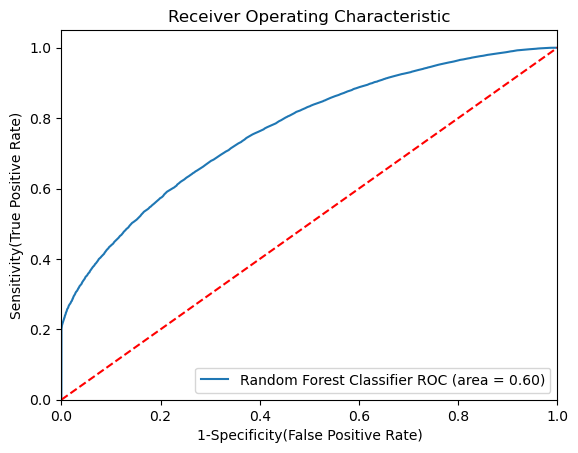

In [43]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                                          max_features=7,max_depth=None),
    'auc':  0.5973
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, Y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
    
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 

The achieved ROC AUC score of 0.6 indicates that the model performs moderately better.